## PRIMER MODELO


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight, resample
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

### Comprobamos GPU y cargamos datos

In [2]:
# Verifica si estás usando GPU
print("Num GPUs encontradas: ", len(tf.config.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print(f"GPU: {tf.test.gpu_device_name()}")
else:
    print("GPU no encontrada.")

# Directorios de datos
train_dir = 'data_/train'
val_dir = 'data_/val'
test_dir = 'data_/test'

Num GPUs encontradas:  0
GPU no encontrada.


## Generadores de datos

In [3]:
# Configuración de generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=50,  # Ajusta según tu hardware
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=50,  # Ajusta según tu hardware
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=50,  # Ajusta según tu hardware
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Ajustamos pesos

In [4]:
# Ajuste del peso de las clases basado en la proporción del dataset
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

## Definimos modelo mas entrenamiento

In [5]:
# Definición del modelo
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weights,  # Se aplica el ajuste de peso de clases
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/25


c:\Users\Alvaro\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 690s 6s/step - accuracy: 0.6479 - loss: 0.6926 - val_accuracy: 0.7500 - val_loss: 0.3993
Epoch 2/25
  1/104 ━━━━━━━━━━━━━━━━━━━━ 3:05 2s/step - accuracy: 0.8600 - loss: 0.2959

c:\Users\Alvaro\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8600 - loss: 0.2959 - val_accuracy: 0.8125 - val_loss: 0.4514
Epoch 3/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 477s 4s/step - accuracy: 0.8987 - loss: 0.2570 - val_accuracy: 0.8125 - val_loss: 0.4102
Epoch 4/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.8200 - loss: 0.3501 - val_accuracy: 0.8125 - val_loss: 0.3708
Epoch 5/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 471s 4s/step - accuracy: 0.8964 - loss: 0.2451 - val_accuracy: 0.8750 - val_loss: 0.2472
Epoch 6/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8800 - loss: 0.2009 - val_accuracy: 0.8750 - val_loss: 0.3940
Epoch 7/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 471s 4s/step - accuracy: 0.9115 - loss: 0.2144 - val_accuracy: 0.7500 - val_loss: 0.3656
Epoch 8/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9000 - loss: 0.2089 - val_accuracy: 0.8125 - val_loss: 0.3988


## Graficamos entrenamiento


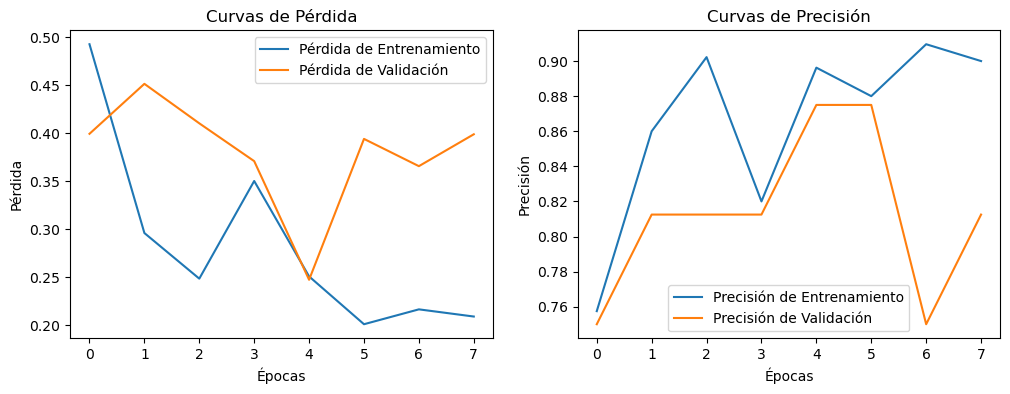

12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.8815 - loss: 0.2843
Test accuracy: 89.67%


In [6]:
# Función para graficar el historial del entrenamiento
def graficar_historial(history):
    # Curvas de pérdida
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title('Curvas de Pérdida')

    # Curvas de precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.title('Curvas de Precisión')

    plt.show()

# Graficar el historial del entrenamiento
graficar_historial(history)

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

## Evaluamos Modelo

In [7]:
# Evaluación del modelo
# Función para calcular y mostrar las métricas de evaluación adicionales
def evaluar_modelo(generator, model):
    # Obtener las etiquetas verdaderas y las predicciones del modelo
    etiquetas = generator.classes
    predicciones = model.predict(generator)
    predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

    # Calcular precisión, sensibilidad, especificidad y AUC-ROC
    precision = precision_score(etiquetas, predicciones_binarias)
    sensibilidad = recall_score(etiquetas, predicciones_binarias)
    fpr, tpr, _ = roc_curve(etiquetas, predicciones)
    auc_roc = roc_auc_score(etiquetas, predicciones)
    especificidad = (1 - fpr[1])  # Specificity calculation
    # Imprimir las métricas
    print(f'Precisión: {precision*100:.2f}%')
    print(f'Sensibilidad: {sensibilidad*100:.2f}%')
    print(f'Especificidad: {especificidad*100:.2f}%')
    print(f'AUC-ROC: {auc_roc:.2f}')

   
# Evaluar el modelo
evaluar_modelo(test_generator, model)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {accuracy*100:.2f}%')

13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step
Precisión: 62.20%
Sensibilidad: 60.77%
Especificidad: 99.57%
AUC-ROC: 0.51
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8740 - loss: 0.3017
Test accuracy: 89.00%


## Graficamos predicciones

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


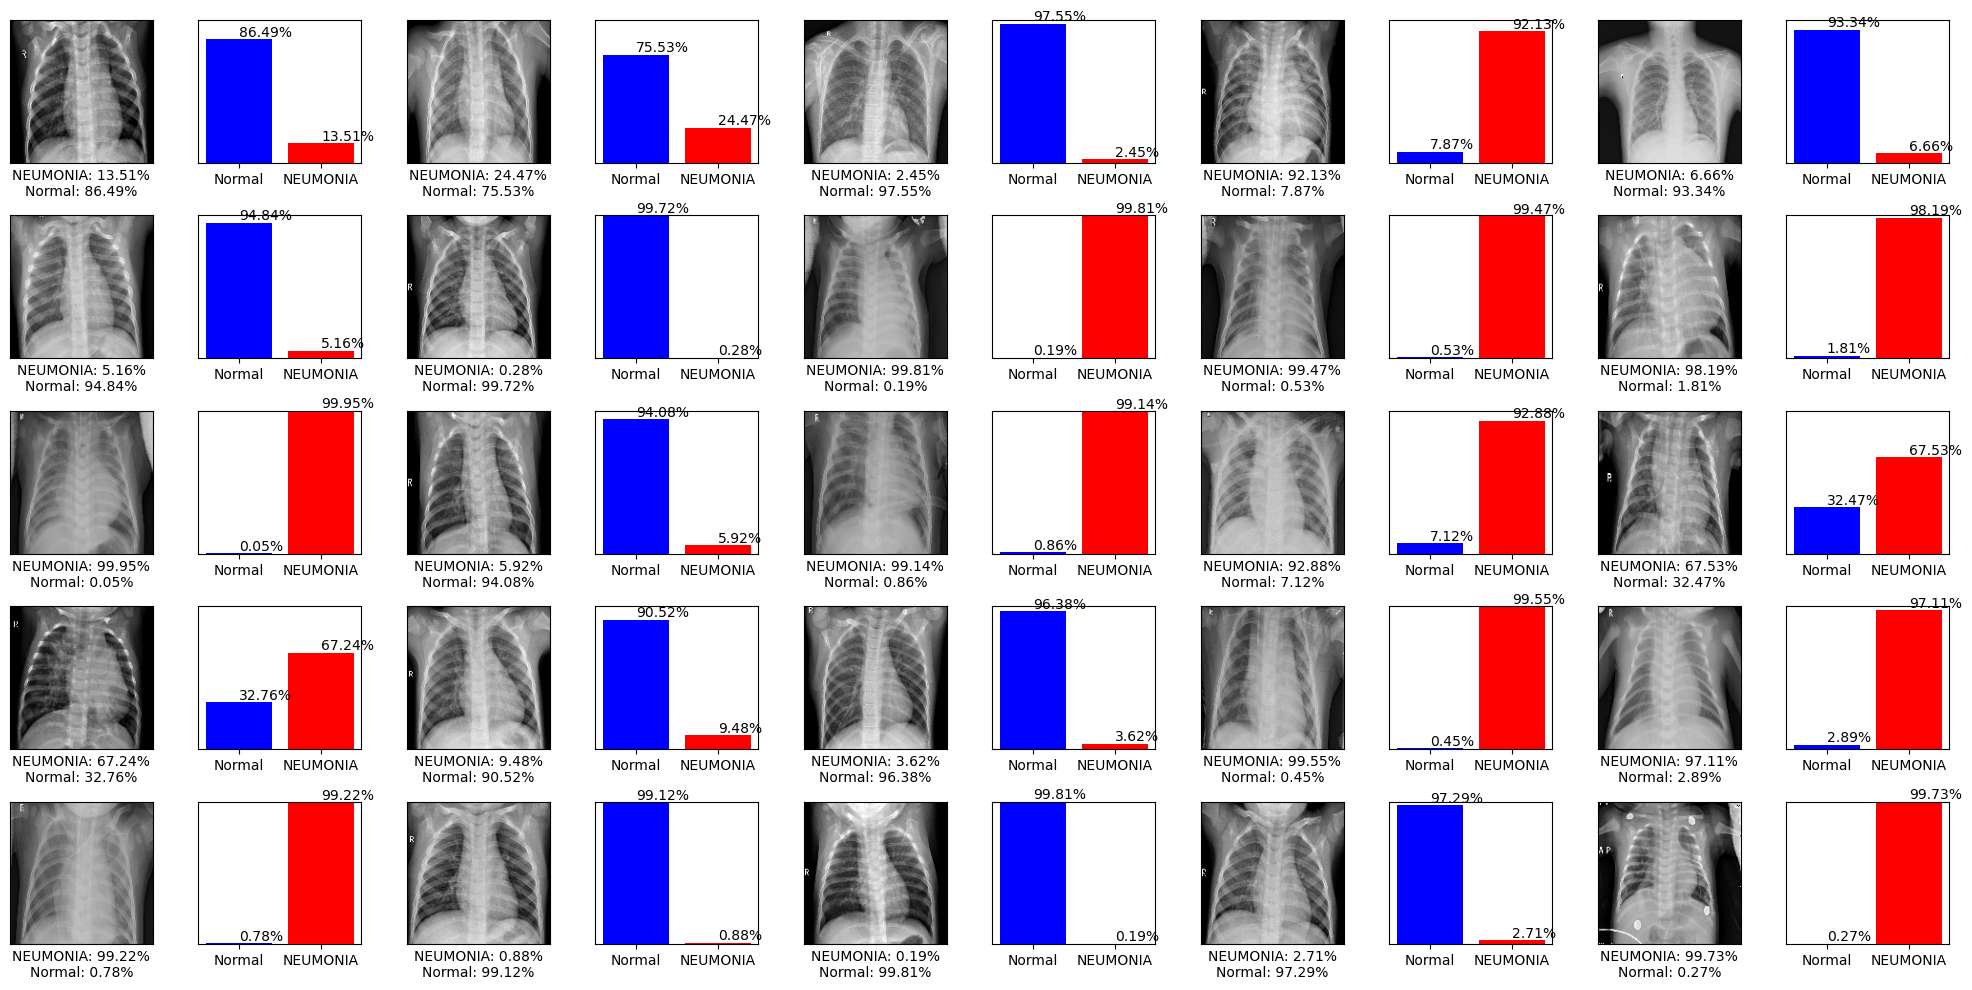

In [8]:
# Función para graficar la imagen con la predicción
def graficar_imagen(i, arr_predicciones, imagenes):
    prediccion = arr_predicciones[i][0]
    img = imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    porcentaje_covid = prediccion * 100
    porcentaje_normal = (1 - prediccion) * 100

    plt.xlabel(f"NEUMONIA: {porcentaje_covid:.2f}%\nNormal: {porcentaje_normal:.2f}%")

# Función para graficar el valor del arreglo de predicciones
def graficar_valor_arreglo(i, arr_predicciones):
    prediccion = arr_predicciones[i][0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar([0, 1], [1 - prediccion, prediccion], color=["blue", "red"])
    plt.ylim([0, 1])

    plt.xticks([0, 1], ['Normal', 'NEUMONIA'])
    for bar, percentage in zip(grafica, [1 - prediccion, prediccion]):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage*100:.2f}%', va='bottom')

# Obtener un lote de datos de prueba
imagenes_prueba, _ = next(test_generator)
predicciones = model.predict(imagenes_prueba)

# Parámetros de la cuadrícula
filas = 5
columnas = 5
num_imagenes = filas * columnas

# Crear la figura para las imágenes y predicciones
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))

for i in range(num_imagenes):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predicciones, imagenes_prueba)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones)

plt.tight_layout()
plt.show()


## SEGUNDO MODELO




In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, utils
from keras import saving
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.applications import VGG16
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


# CARGAR DATOS SEGUNDO MODELO


In [3]:
def path_builder(path):
    built_path=os.path.sep.join(['.',path])
    return built_path

nimages_path=path_builder('./TFM/NORMAL')
pimages_path=path_builder('./TFM/PNEUMONIA')
nmimages_path=path_builder('./Muestra/Normal')
pmimages_path=path_builder('./Muestra/Pneumonia')

In [4]:
def rotate_images(image,label):
    image9 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    image18 = cv2.rotate(image, cv2.ROTATE_180)
    image27 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    images = np.array([image,image9,image18,image27])
    labels = [label,label,label,label]
    return images, labels

In [3]:
def show_loss_accuracy_evolution(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()


# Lectura de imágenes con Autoencoder para reducción de dimensionalidad y modelado

In [2]:
saving.get_custom_objects().clear()
class Encoder(layers.Layer):
    def __init__(self, latent_dim, input_shape, name="encoder", **kwargs):
        super(Encoder, self).__init__(name=name, **kwargs)
        self.input_shape = input_shape
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            tf.keras.Input(shape=input_shape, name='input'),
            layers.Flatten(),                       
            layers.Dense(8*latent_dim, activation='relu'),
            layers.Dense(4*self.latent_dim, activation='relu'),
            layers.Dense(2*self.latent_dim, activation='relu'),
            layers.Dense(self.latent_dim, activation='relu')])                          
           
    def call(self, inputs):        
        x = self.encoder(inputs)                                    
        return x
    
    def get_config(self):
        config = super(Encoder, self).get_config()
        config.update({
            "latent_dim": self.latent_dim,
            "input_shape": self.input_shape,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


class Decoder(layers.Layer):
    """Converts z, the encoded digit vector, back into a readable digit."""

    def __init__(self, original_dim, latent_dim, name="decoder", **kwargs):
        super(Decoder, self).__init__(name=name, **kwargs)
        self.original_dim = original_dim
        self.latent_dim = latent_dim
        self.decoder = tf.keras.Sequential([
            layers.Dense(2*latent_dim, activation='relu'),
            layers.Dense(4*latent_dim, activation='relu'),
            layers.Dense(8*latent_dim, activation='relu'),     
            layers.Dense(self.original_dim, activation='sigmoid'),
            layers.Reshape((1000,1000))])
                          
    def call(self, inputs):
        x = self.decoder(inputs)
        return x
    
    def get_config(self):
        config = super(Decoder, self).get_config()
        config.update({
            "original_dim":self.original_dim,
            "latent_dim":self.latent_dim,
        })
        return config
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)
    

@saving.register_keras_serializable(package='Compresor')
class AutoEncoder2(tf.keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        original_dim,
        latent_dim,
        input_shape,
        name="autoencoder",
        **kwargs
    ):
        super(AutoEncoder2, self).__init__(name=name, **kwargs)
        self.latent_dim = latent_dim
        self.original_dim = original_dim
        self.input_shape = input_shape
        self.encoder = Encoder(latent_dim=latent_dim,input_shape=input_shape)
        self.decoder = Decoder(original_dim=original_dim,latent_dim=latent_dim)

    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x
    
    def get_config(self):
        config = super(AutoEncoder2, self).get_config()
        config.update({
            "original_dim": self.original_dim,
            "latent_dim": self.latent_dim,
            "input_shape": self.input_shape,
        })
        return config
    
    @saving.register_keras_serializable(package='Compresor', name='custom')
    def custom_fn(x):
        return x**2
    
    @classmethod
    def from_config(cls,config):
        return cls(**config)

latent_dim= 64
original_dim=(1000*1000)
input_shape=(1000,1000)
autoencoder = AutoEncoder2(original_dim=original_dim, latent_dim=latent_dim, input_shape=input_shape)
autoencoder.compile(optimizer='adam', loss='mse')

In [4]:
muestra=[]
def read_muestra(path,image_list):
    for image in os.listdir(path):
        image = os.path.sep.join([path, image])

        if os.path.exists(image):
            image = cv2.imread(image)
            image = cv2.resize(image, (1000, 1000))            
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)            
            image = image/255.0            
            image_list.append(image)                                   
        else:
            continue
    
read_muestra(nmimages_path,muestra)
read_muestra(pmimages_path,muestra)
muestra=np.array(muestra)
# muestra=np.expand_dims(muestra,-1)  

In [5]:
autoencoder.fit(muestra,muestra,
                epochs=1,
                batch_size=10,
                validation_split=0.2)    

8/8 ━━━━━━━━━━━━━━━━━━━━ 1106s 146s/step - loss: 0.0501 - val_loss: 0.0303


In [13]:
test_mse = autoencoder.evaluate(muestra, muestra)
print('MSE Test:', test_mse)

MemoryError: Unable to allocate 381. MiB for an array with shape (100, 1000, 1000) and data type float32

In [10]:
images=[]
targets=[]
def compress_images(path,image_list,label_list,label):
    for image in os.listdir(path):
        image = os.path.sep.join([path, image])
    
        if os.path.exists(image):
            image = cv2.imread(image)            
            image = cv2.resize(image, (1000, 1000))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)            
            image = image/255.0
            images, labels = rotate_images(image,label)            
            images = autoencoder.encoder(images).numpy()
            images = images.tolist()            
            image_list.extend(images)
            label_list.extend(labels)
                                   
        else:
            continue

compress_images(nimages_path,images,targets,'Normal')
compress_images(pimages_path,images,targets,'Pneumonia')
targets=np.asarray(targets)
images=np.asarray(images)

In [13]:
targets= targets.reshape(-1,1)
Encoder = OneHotEncoder(drop=['Normal'],handle_unknown='ignore',sparse_output=False)
targets = Encoder.fit_transform(targets)

# Encontrar valores constantes en imágenes comprimidas y descartarlos

In [ ]:
images_df=pd.DataFrame(images)
images_df["Target"]=targets

In [35]:
def calculate_woe_ivs(df,variable,target,bins=10):
   
   df_woe=pd.DataFrame()

   if df[variable].nunique() > bins:
      cat_variable = pd.qcut(df[variable],bins,duplicates='drop')
      df_cat = pd.DataFrame({'cats':cat_variable,'Y':df[target]})
   else:
      df_cat = pd.DataFrame({'cats':df[variable],'Y':df[target]})

   df_woe=pd.concat([df_woe,df_cat['cats'].astype('category'),df_cat['Y']],axis=1)
   df_woe=df_woe.groupby(by=['cats'],observed=True)[['Y']].agg(['count','sum'])
   df_woe.columns = ['Total', 'Bad']
   df_woe['Good'] = df_woe['Total'] - df_woe['Bad']
   df_woe['Good_porc']=df_woe['Good']/df_woe['Good'].sum()
   df_woe['Bad_porc']=df_woe['Bad']/df_woe['Bad'].sum()
   df_woe['WoE']=np.log(df_woe['Good_porc']/df_woe['Bad_porc'])
   df_woe['IV']=df_woe['WoE']*(df_woe['Bad_porc']-df_woe['Good_porc'])      
   woe = df_woe['WoE'].sum()
   iv = df_woe['IV'].sum()

   if (woe < 0) & (iv < 0):
      woe = -woe
      iv = -iv
   elif woe < 0:
      woe = -woe
   elif iv < 0:
      iv = -iv

   df_ivs = {'Variable':variable,'WoE':woe,'IV':iv}
   return df_ivs

In [36]:
ivs=[]
features=images_df.iloc[:,0:64]

for feature in features:
    df_iv=calculate_woe_ivs(images_df,feature,'Target')
    ivs.append(df_iv)

df_ivs=pd.DataFrame.from_dict(ivs, orient='columns')
df_ivs=df_ivs.sort_values(by='IV', ascending=False)

d:\Python\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
drop_vars = []
for (i, row) in df_ivs.iterrows():
    if (row["IV"] < 0.1) or (np.isinf(row["IV"])):
        drop_vars.append(row["Variable"])  
      

In [39]:
df_ivs=df_ivs.drop(index=drop_vars)
images_red=images_df.drop(columns=drop_vars)

In [41]:
df_ivs

,Variable,WoE,IV
39,39,0.754955,0.269272
23,23,0.729010,0.259298
13,13,0.614313,0.221795
19,19,0.597984,0.215750
50,50,0.519296,0.186779
22,22,0.491757,0.179362
27,27,0.393937,0.148743
3,3,0.360649,0.135004
37,37,0.323070,0.117548


In [16]:
targets = images_red['Target']
images_red = images_red.drop(columns=['Target'])

(23360,)

# Modelos

## Red neuronal

In [18]:
x_train, x_test, y_train, y_test = train_test_split(images_red, targets, test_size=0.2, random_state=5)

In [19]:
inputs = keras.Input(shape=(9,), name='input_layer')

l_1 = layers.Dense(9, activation='relu')(inputs)
l_2 = layers.Dense(18, activation='relu')(l_1)
l_3 = layers.Dense(18, activation='relu')(l_2)
l_4 = layers.Dense(9, activation='relu')(l_3)

outputs = layers.Dense(1, activation='sigmoid', name='output')(l_4)

model2 = keras.Model(inputs=inputs, outputs=outputs, name='second_model')

In [20]:
model2.summary()

Model: "second_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           171 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 793 (3.10 KB)

 Trainable params: 793 (3.10 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)

epochs = 10
model2_results=model2.fit(x=x_train, 
                        y=y_train, 
                        batch_size=16, 
                        epochs=epochs, 
                        validation_split=0.1,
                        callbacks=[es_callback])

Epoch 1/10
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7322 - loss: 0.5909 - val_accuracy: 0.7287 - val_loss: 0.5910
Epoch 2/10
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7295 - loss: 0.5896 - val_accuracy: 0.7287 - val_loss: 0.5886
Epoch 3/10
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7251 - loss: 0.5948 - val_accuracy: 0.7287 - val_loss: 0.5971
Epoch 4/10
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7324 - loss: 0.5855 - val_accuracy: 0.7287 - val_loss: 0.5879
Epoch 5/10
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7264 - loss: 0.5891 - val_accuracy: 0.7287 - val_loss: 0.5869
Epoch 6/10
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7356 - loss: 0.5795 - val_accuracy: 0.7287 - val_loss: 0.5878
Epoch 7/10
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7314 - loss: 0.5842 - val_accuracy: 0.7287 - val_loss: 0.5874
Epoch 8/10
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7320 - loss: 0.5834 - 

In [4]:
show_loss_accuracy_evolution(model2_results)

NameError: name 'model2_results' is not defined

In [27]:
predictions = model2.predict(x_test)
y_predics = (predictions > 0.7287).astype('int32')


print(confusion_matrix(y_test, y_predics))
print(classification_report(y_test, y_predics))

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 993  298]
 [2268 1113]]
              precision    recall  f1-score   support

         0.0       0.30      0.77      0.44      1291
         1.0       0.79      0.33      0.46      3381

    accuracy                           0.45      4672
   macro avg       0.55      0.55      0.45      4672
weighted avg       0.65      0.45      0.46      4672



In [197]:
fpr, tpr, umbrales = metrics.roc_curve(y_test,y_predics)
roc = metrics.roc_auc_score(y_test,y_predics)


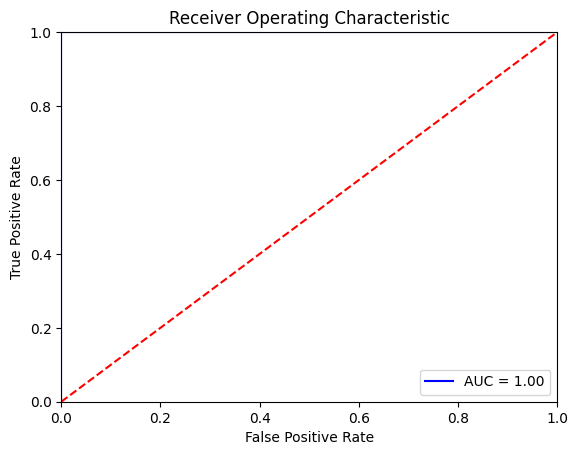

In [198]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Otro clasificador

In [19]:
param_grid = {'n_estimators': [50,75,100,150],
              'max_features': [3, 6, 9],
              'max_depth'   : [None, 3,9,10,20]
             }

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = RepeatedKFold(n_splits=10, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = x_train, y = y_train)

# Resultados
print(grid.best_estimator_)

RandomForestClassifier(max_features=9, n_estimators=150, random_state=123)


In [29]:
RF = RandomForestClassifier(max_features=9, n_estimators=150, random_state=123)
RF.fit(x_train, y_train)
acierto_entrenamiento = RF.score(x_train, y_train)
acierto_test = RF.score(x_test, y_test)
print("Acierto en el conjunto de entrenamiento: {0:.2f}%".format(acierto_entrenamiento*100.))
print("Acierto en el conjunto de test: {0:.2f}%".format(acierto_test*100.))

Acierto en el conjunto de entrenamiento: 99.99%
Acierto en el conjunto de test: 77.76%


In [30]:
predictions = RF.predict(x_test)
y_predics = (predictions > 0.7287).astype('int32')


print(confusion_matrix(y_test, y_predics))
print(classification_report(y_test, y_predics))

[[ 523  768]
 [ 271 3110]]
              precision    recall  f1-score   support

         0.0       0.66      0.41      0.50      1291
         1.0       0.80      0.92      0.86      3381

    accuracy                           0.78      4672
   macro avg       0.73      0.66      0.68      4672
weighted avg       0.76      0.78      0.76      4672



In [35]:
fpr, tpr, umbrales = metrics.roc_curve(y_test,y_predics)
roc = metrics.roc_auc_score(y_test,y_predics)


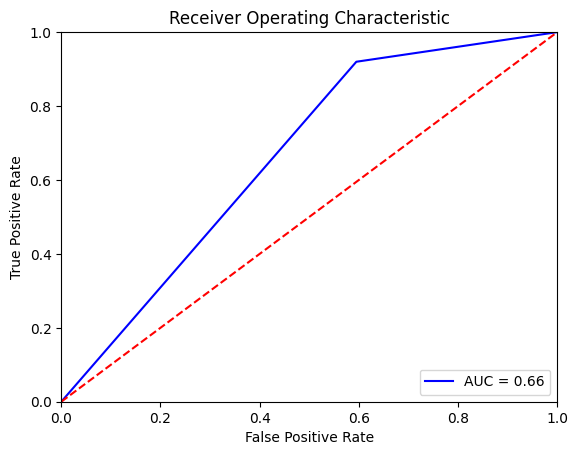

In [36]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Cargar imágenes con un modelo preentrenado cuyo output sera el input para nuestra red neuronal

In [5]:
def pretrain_model(model,shape):
    pretrained_model = model(include_top=False, input_tensor=shape, weights='imagenet')
    pretrained_model.trainable=False
        
    return pretrained_model


In [6]:
targets = []
images = []
def read_images(path,image_list,label_list,label):
    for image in os.listdir(path):
        image = os.path.sep.join([path, image])
    
        if os.path.exists(image):
            image = cv2.imread(image)            
            image = cv2.resize(image, (150, 150))           
            image_list.append(image)
            label_list.append(label)                    
                       
        else:
            continue

read_images(nimages_path,images,targets,'Normal')
read_images(pimages_path,images,targets,'Pneumonia')
targets=np.asarray(targets)
images=np.asarray(images)

In [5]:
targets= targets.reshape(-1,1)
Encoder = OneHotEncoder(drop=['Normal'],handle_unknown='ignore',sparse_output=False)
targets = Encoder.fit_transform(targets)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(images, targets, test_size=0.2, random_state=5)

In [6]:
pretrained_model=pretrain_model(VGG16,tf.keras.Input(shape=(150,150,3)))
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
inputs = tf.keras.Input(shape=(150,150,3), name='input')

x = pretrained_model(inputs)

flat = layers.Flatten(name='flatten')(x)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
drop = layers.Dropout(0.5,seed=30, name='dropout')(dense)
dense = layers.Dense(32, activation='relu', name='dense1')(drop)
outputs = layers.Dense(1, activation='sigmoid', name='output')(dense)

model3 = keras.Model(inputs=inputs, outputs=outputs, name='Third_model')

In [9]:
model3.summary()

Model: "Third_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,322,497 (62.27 MB)

 Trainable params: 1,607,809 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)

epochs = 10
model_results3=model3.fit(x=x_train, 
                        y=y_train, 
                        batch_size=32, 
                        epochs=epochs, 
                        validation_split=0.2,
                        callbacks=[es_callback])

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 701s 5s/step - accuracy: 0.8104 - loss: 0.8806 - val_accuracy: 0.9359 - val_loss: 0.2085
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 665s 5s/step - accuracy: 0.9296 - loss: 0.2140 - val_accuracy: 0.9359 - val_loss: 0.2495
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 722s 5s/step - accuracy: 0.9604 - loss: 0.1138 - val_accuracy: 0.9338 - val_loss: 0.2326
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 724s 5s/step - accuracy: 0.9586 - loss: 0.1067 - val_accuracy: 0.9423 - val_loss: 0.2062
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 728s 6s/step - accuracy: 0.9740 - loss: 0.0615 - val_accuracy: 0.9423 - val_loss: 0.1961
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 727s 6s/step - accuracy: 0.9837 - loss: 0.0457 - val_accuracy: 0.9444 - val_loss: 0.2552
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 729s 6s/step - accuracy: 0.9894 - loss: 0.0355 - val_accuracy: 0.9380 - val_loss: 0.2399
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 734s 6s/step - accuracy: 0.9919 - loss: 0.0261 - val_accu

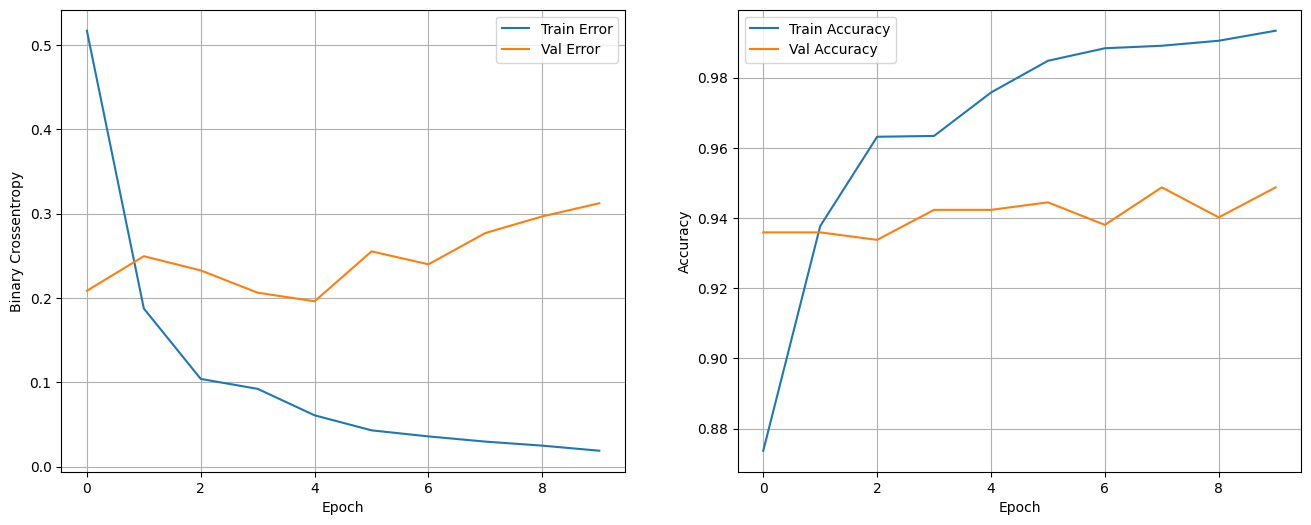

In [18]:
show_loss_accuracy_evolution(model_results3)

In [ ]:
predictions = model.predict(x_test)
y_predics = (predictions > 0.5).astype('int32')


print(confusion_matrix(y_test, y_predics))
print(classification_report(y_test, y_predics))

In [ ]:
filas = 5
columnas = 5
num_imagenes = filas * columnas

In [ ]:
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predictions, x_test)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predictions)

plt.tight_layout()
plt.show()

In [ ]:
fpr, tpr, umbrales = metrics.roc_curve(y_test,y_predics)
roc = metrics.roc_auc_score(y_test,y_predics)

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## TERCER MODELO

# Librerias mas cargas de datos

In [8]:
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
import pandas as pd
import numpy as np
import os
import cv2
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data_dir='data'
data_dir = pathlib.Path(data_dir)
data_dir_train = 'data/train'
data_dir_train = pathlib.Path(data_dir_train)
data_dir_test = 'data/test'
data_dir_test = pathlib.Path(data_dir_test)
data_dir_val = 'data/val'
data_dir_val = pathlib.Path(data_dir_val)

In [9]:
def show_loss_accuracy_evolution(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [10]:
def show_errors(val_ds, model, class_names_list, n_images=10):
    n_plots = 0
    for images, labels in val_ds:
        pred_probs = model.predict(images)
        preds = pred_probs.argmax(axis=-1)
        bad_pred_inds = np.where(preds != labels)[0]
        for ind in list(bad_pred_inds):
            n_plots += 1
            real_class = class_names_list[labels[ind].numpy()]
            pred_class = class_names_list[preds[ind]]
            prob = pred_probs[ind].max()
            prob_real = pred_probs[ind][[
                i for i, c in enumerate(class_names_list) if c == real_class
            ][0]]
            plt.imshow(images[ind].numpy().astype("uint8"))
            plt.title(
                'Predicted: {0}, prob: {1:.2f} \n real: {2}, prob: {3:.2f}'
                .format(pred_class, prob, real_class, prob_real))
            plt.show()

            if n_plots == n_images:
                return
    return

### Tamaño minimo de imagenes

alto minimo = 127
ancho minimo = 384

In [11]:
clases=os.listdir(data_dir_train)
clases

['NORMAL', 'PNEUMONIA']

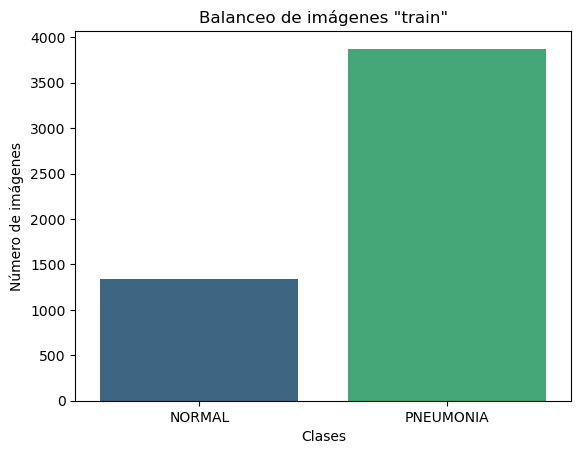

In [12]:
conteo=[]
for i in clases:
  path_images = os.path.join(data_dir_train,i)
  conteo.append(len(os.listdir(path_images)))

data = pd.DataFrame({'Clases': clases, 'Imagenes': conteo})
sns.barplot(x='Clases', y='Imagenes', data=data, palette='viridis')
plt.ylabel('Número de imágenes')
plt.title('Balanceo de imágenes "train"')
plt.show()

In [13]:
path_images

'data\\train\\PNEUMONIA'

In [14]:
for a in os.listdir(data_dir):

  for i in clases:
    ancho_peq = 2**20
    alto_peq = 2**20
    path_images = os.path.join(data_dir,a)
    path_images = os.path.join(path_images,i)
    for row in os.scandir(path_images):
      alto, ancho, _ = cv2.imread(row.path).shape

      if alto > alto_peq:
        continue
      else:
        alto_peq = alto

      if ancho > ancho_peq:
        continue
      else:
        ancho_peq = ancho

    print(f'El alto de imagen mas pequeño en {a} de {i} es {alto_peq}')
    print(f'El ancho de imagen mas pequeño en {a} de {i} es {ancho_peq}')

El alto de imagen mas pequeño en test de NORMAL es 496
El ancho de imagen mas pequeño en test de NORMAL es 984
El alto de imagen mas pequeño en test de PNEUMONIA es 344
El ancho de imagen mas pequeño en test de PNEUMONIA es 728
El alto de imagen mas pequeño en train de NORMAL es 672
El ancho de imagen mas pequeño en train de NORMAL es 912
El alto de imagen mas pequeño en train de PNEUMONIA es 127
El ancho de imagen mas pequeño en train de PNEUMONIA es 384
El alto de imagen mas pequeño en val de NORMAL es 928
El ancho de imagen mas pequeño en val de NORMAL es 1272
El alto de imagen mas pequeño en val de PNEUMONIA es 592
El ancho de imagen mas pequeño en val de PNEUMONIA es 968


In [15]:
heigths= []
widths = []
for a in os.listdir(data_dir):
  for i in clases:
    path_images = os.path.join(data_dir,a)
    path_images = os.path.join(path_images,i)
    for row in os.scandir(path_images):
      alto, ancho, _ = cv2.imread(row.path).shape
      heigths.append(alto)
      widths.append(ancho)

In [16]:
val_heigths, count_heigths = np.unique(heigths, return_counts=True)
val_widths, count_widths = np.unique(widths, return_counts=True)

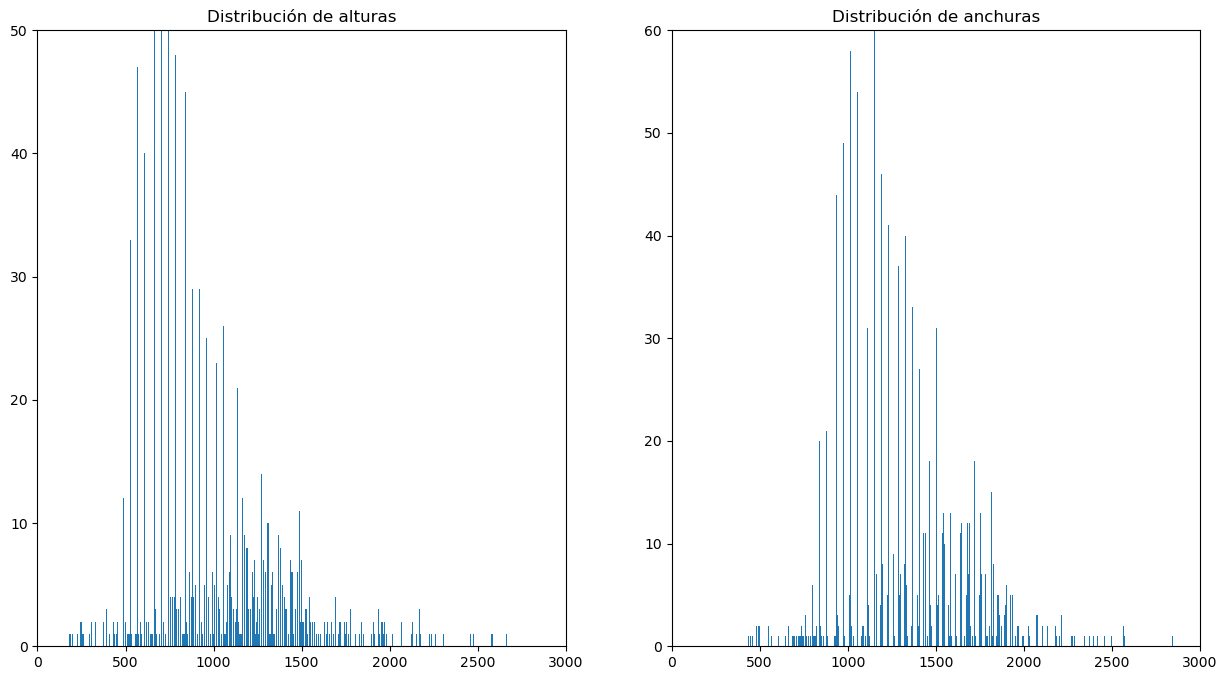

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.bar(val_heigths,count_heigths, label="Height", width= 1)

ax1.set_title("Distribución de alturas")
ax1.set_xlim([0, 3000])
ax1.set_ylim([0, 50])


ax2.bar(val_widths, count_widths, label="Width", width= 1)

ax2.set_title("Distribución de anchuras")
ax2.set_xlim([0, 3000])
ax2.set_ylim([0, 60])

plt.show()

In [18]:
IMAGE_SIZE = (224,224)

In [19]:
def get_images_and_labels(directory):
    data = []
    labels = []
    total=len(os.listdir(directory))
    i=0
    for img in os.listdir(directory):
            img_path = os.path.join(directory, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, IMAGE_SIZE)
            data.append(img_array)
            labels.append(directory.parts[-1])
            i+=1
            print(f'uploaded {directory.parts[-1]} images: {i} of {total}')
    return np.array(data), np.array(labels)


In [20]:
train_PNEUMO_images, train_PNEUMO_labels = get_images_and_labels(pathlib.Path('data/train/PNEUMONIA'))
train_NORMAL_images, train_NORMAL_labels = get_images_and_labels(pathlib.Path('data/train/NORMAL'))
test_PNEUMO_images, test_PNEUMO_labels = get_images_and_labels(pathlib.Path('data/PNEUMONIA'))
test_NORMAL_images, test_NORMAL_labels = get_images_and_labels(pathlib.Path('data/train/NORMAL'))

uploaded PNEUMONIA images: 1 of 3875
uploaded PNEUMONIA images: 2 of 3875
uploaded PNEUMONIA images: 3 of 3875
uploaded PNEUMONIA images: 4 of 3875
uploaded PNEUMONIA images: 5 of 3875
uploaded PNEUMONIA images: 6 of 3875
uploaded PNEUMONIA images: 7 of 3875
uploaded PNEUMONIA images: 8 of 3875
uploaded PNEUMONIA images: 9 of 3875
uploaded PNEUMONIA images: 10 of 3875
uploaded PNEUMONIA images: 11 of 3875
uploaded PNEUMONIA images: 12 of 3875
uploaded PNEUMONIA images: 13 of 3875
uploaded PNEUMONIA images: 14 of 3875
uploaded PNEUMONIA images: 15 of 3875
uploaded PNEUMONIA images: 16 of 3875
uploaded PNEUMONIA images: 17 of 3875
uploaded PNEUMONIA images: 18 of 3875
uploaded PNEUMONIA images: 19 of 3875
uploaded PNEUMONIA images: 20 of 3875
uploaded PNEUMONIA images: 21 of 3875
uploaded PNEUMONIA images: 22 of 3875
uploaded PNEUMONIA images: 23 of 3875
uploaded PNEUMONIA images: 24 of 3875
uploaded PNEUMONIA images: 25 of 3875
uploaded PNEUMONIA images: 26 of 3875
uploaded PNEUMONIA im

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'data\\PNEUMONIA'

In [ ]:
print(PNEUMO_images.shape)
print(NORMAL_images.shape)
print(PNEUMO_labels.shape)
print(NORMAL_labels.shape)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,  # Rotación aleatoria
    width_shift_range=0.1,  # Desplazamiento horizontal
    height_shift_range=0.1,  # Desplazamiento vertical
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal
    fill_mode='nearest',  # Modo de relleno
)

datanorm = ImageDataGenerator(
  rescale=1./255,  # Solo normalización
)

In [ ]:
def augmentation(data_im, data_lb, name):
  all_arrays = []
  all_labels = []
  BATCH_SIZE_im = 32
  im2=datagen.flow(data_im, y=data_lb, batch_size=BATCH_SIZE_im, seed=12)

  for i in range(len(data_im)//BATCH_SIZE_im):
    new_array, new_label = next(im2)
    all_arrays.append(new_array)
    all_labels.append(new_label)
    print(f'{i+1} of {len(data_im)//BATCH_SIZE_im} of {name}')

  all_arrays = np.concatenate(all_arrays, axis=0)
  all_labels = np.concatenate(all_labels, axis=0)

  bal_im_data = np.concatenate([data_im, all_arrays], axis=0)
  bal_lb_data = np.concatenate([data_lb, all_labels], axis=0)

  return bal_im_data, bal_lb_data

In [ ]:
aug_NORMAL_images, aug_NORMAL_labels = augmentation(NORMAL_images, NORMAL_labels, 'NORMAL')

In [ ]:
print(aug_NORMAL_images.shape)
print(aug_NORMAL_labels.shape)

In [ ]:
def normalitation(data_im, data_lb, name):
  all_arrays = []
  all_labels = []
  BATCH_SIZE_im = 64
  im2=datanorm.flow(data_im, y=data_lb, batch_size=BATCH_SIZE_im, seed=12)

  for i in range(len(data_im)//BATCH_SIZE_im):
      new_array, new_label = next(im2)
      all_arrays.append(new_array)
      all_labels.append(new_label)
      print(f'{i+1} of {len(data_im)//BATCH_SIZE_im} of {name}')

  bal_data_im = np.concatenate(all_arrays, axis=0)
  bal_data_lb = np.concatenate(all_labels, axis=0)

  return bal_data_im, bal_data_lb

In [ ]:
bal_NORMAL_images, bal_NORMAL_labels = normalitation(aug_NORMAL_images, aug_NORMAL_labels, 'NORMAL')
bal_PNEUMONIA_images, bal_PNEUMONIA_labels = normalitation(PNEUMO_images, PNEUMO_labels, 'PNEUMONIA')

In [ ]:
print(bal_NORMAL_images.shape)
print(bal_NORMAL_labels.shape)
print(bal_PNEUMONIA_images.shape)
print(bal_PNEUMONIA_labels.shape)

In [ ]:
# NORMAL = 0       PNEUMONIA = 1

bal_PNEUMONIA_labels_encoded = np.where(bal_PNEUMONIA_labels == 'PNEUMONIA', 1, bal_PNEUMONIA_labels)
bal_NORMAL_labels_encoded = np.where(bal_NORMAL_labels == 'NORMAL', 0, bal_NORMAL_labels)

In [ ]:
imagenes_combinadas = np.concatenate((bal_PNEUMONIA_images,bal_NORMAL_images))
labels_combinadas = np.concatenate((bal_PNEUMONIA_labels_encoded,bal_NORMAL_labels_encoded))

print(imagenes_combinadas.shape)
print(labels_combinadas.shape)

np.random.seed(42)
indices = np.arange(imagenes_combinadas.shape[0])

np.random.shuffle(indices)

imagenes_mezcladas = imagenes_combinadas[indices]
labels_mezcladas = labels_combinadas[indices]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    imagenes_mezcladas, labels_mezcladas, test_size=0.2, random_state=42
)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

## U-NET Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Dropout

def Conv_3_k(in_channels, out_channels):
    model = tf.keras.Sequential()
    model.add(Conv2D(out_channels, kernel_size=3, strides=1, padding='same', input_shape=(None, None, in_channels)))
    return model

def Double_Conv(in_channels, out_channels):
    model = tf.keras.Sequential()
    model.add(Conv_3_k(in_channels, out_channels))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(ReLU())
    return model

def Down_Conv(in_channels, out_channels):
    model = tf.keras.Sequential()
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Double_Conv(in_channels, out_channels))
    return model

def middle_UNET(in_channels, out_channels):
    model = tf.keras.Sequential()
    model.add(Double_Conv(in_channels, out_channels))
    model.add(Down_Conv(out_channels, out_channels*2))
    model.add(Down_Conv(out_channels*2, out_channels*4))
    model.add(Down_Conv(out_channels*4, out_channels*8))
    model.add(Down_Conv(out_channels*8, out_channels*16))
    return model


In [ ]:
#compresor
model.add(middle_UNET(3,12))
print(model.output_shape)

#Capas completamente conectadas
model.add(Flatten())
print(model.output_shape)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
print(model.output_shape)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))

#Capa de salida
model.add(Dense(1, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)
mc_callback = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True)

In [ ]:
epochs = 15
BATCH_SIZE = 32
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.1,
    batch_size=BATCH_SIZE,
    epochs=epochs,
    callbacks=[es_callback, mc_callback]
)
show_loss_accuracy_evolution(history)


In [ ]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
predictions = model.predict(test_ds)
y_predics = (predictions > 0.5).astype('int32')

print(f'Test accuracy: {accuracy*100:.2f}%')
print(confusion_matrix(y_test, y_predics))
print(classification_report(y_test, y_predics))

In [ ]:
predictions = model.predict(test_ds)
#predictions = predictions.reshape(1,-1)[0]
predictions[:15]

In [ ]:
print(classification_report(test_lb, predictions, target_names = ))

In [ ]:
cm = confusion_matrix(test_lb, predictions)
cm

In [ ]:
show_errors(val_ds, model, class_names_list, n_images=10)

In [ ]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
predictions = model.predict(x_test)
y_predics = (predictions > 0.5).astype('int32')

print(f'Test accuracy: {accuracy*100:.2f}%')
print(confusion_matrix(y_test, y_predics))
print(classification_report(y_test, y_predics))